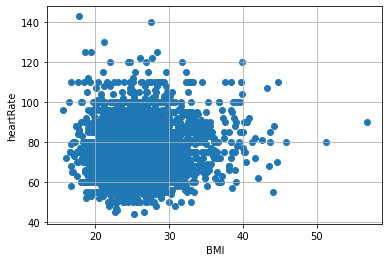

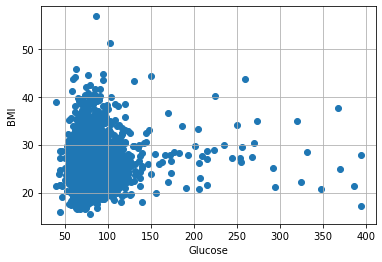

array([[0.8193106, 0.1806894]])

In [26]:
# importing libraries
import pandas as pd
import boto3

# defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'webster-data445-bucket'
bucket = s3.Bucket(bucket_name)

# defining the csv file
file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading the csv file
heart = pd.read_csv(file_content_stream) 
heart.head()

# removing observations with missing values
heart = heart.dropna() 
heart.head()

# importing matplotlib
import matplotlib.pyplot as plt 

# creating a scatterplot of BMI and heartRate
plt.scatter(heart['BMI'], heart['heartRate']) 
plt.xlabel('BMI')
plt.ylabel('heartRate')
plt.grid()
plt.show()

# creating a scatterplot of glucose and BMI
plt.scatter(heart['glucose'], heart['BMI'])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid()
plt.show()

# importing sklearn
from sklearn.linear_model import LogisticRegression

# defining the input and target variable
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

# Building the model
logit_md = LogisticRegression().fit(X, Y)

# characteristics of the new patient
new_patient = [[50, 1, 250, 27, 85]]

# Predicting the likelihood of CHD
logit_md.predict_proba(new_patient)